<a href="https://colab.research.google.com/github/abhi91420/Credit_Approval/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages and dataset

1. Import required packages
2. Import dataset into google drive
3. Mount google drive to colab
4. Read the file using Pandas package method
5. Displaying the First Five rows ( HEAD ) of the dataset

NOTE - 
1. pd is an instance of the pandas package to make it easier to access methods
2. read_csv() - read comma seperated values file

In [86]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# Import statements

# dataframes and related methods
import pandas as pd
import numpy as np 

# machine learning and data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression,LinearRegression,RidgeClassifier

# Graph plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# clean printing
import warnings
warnings.filterwarnings("ignore")

# Load dataset into a dataframe 
dataset_file = pd.read_csv('/content/drive/My Drive/crx.data',header = None)

# Inspect data
dataset_file.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# Custom Functions 

To reduce redundacy

In [115]:
# Extras

"""
* Takes an string argument
* EX - printblock("A word or a sentence")
"""
def printblock(out,i=None):
  if(i!=None):
    print("----------------------------------------------------------------")
    print(out,i)
    print("----------------------------------------------------------------")
  else:
    print("----------------------------------------------------------------")
    print(out,i)
    print("----------------------------------------------------------------")
  
def accuracy(obj):
  print(round(obj.score(x_test_rescaled,y_test)*100,4),"%\n")

def plot(col):
  sns.distplot(col)
  plt.show()

# Understanding the dataset

1. dataset given has meaningless symbols in an attempt to hide the privacy of the data 
2. I have refered to this [link](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) to better understand the possible attribute values 
3. I found out that these are the possible attributes -
ender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and ApprovalStatus.
4. let us now take a look at the dataset and some information regarding it.

In [89]:
# This method will get statistics on this dataset
printblock("DATASET - SUMMARY")
print(dataset_file.describe(),"\n")

# Dataframe information
printblock("DATAFRAME - INFO")
print(dataset_file.info())

----------------------------------------------------------------
DATASET - SUMMARY
----------------------------------------------------------------
               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000 

----------------------------------------------------------------
DATAFRAME - INFO
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non

# Missing Values Handling

1. In the file there are '?' characters which imply mising data 
2. To make that data understandable we will replace them with NaN values

NOTE - NaN - Not a number

In [90]:
# We will use replace function to replace the '?'s 
dataset_file = dataset_file.replace('?',np.NaN)

# fill na values
dataset_file.fillna(dataset_file.mean(),inplace = True)

# NaN count
printblock("NaN count")
dataset_file.isnull().sum()

----------------------------------------------------------------
NaN count
----------------------------------------------------------------


0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [91]:
# Looping through columns
for col in dataset_file.columns:
  if dataset_file[col].dtypes == 'object':
    dataset_file = dataset_file.fillna(dataset_file[col].value_counts().index[0])
printblock("RECHECK - NaN's")
print(dataset_file.isnull().sum())

----------------------------------------------------------------
RECHECK - NaN's
----------------------------------------------------------------
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


# Features Analysis

----------------------------------------------------------------
feature -  2
----------------------------------------------------------------


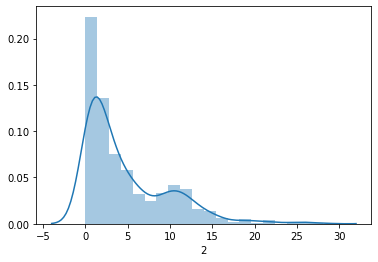

----------------------------------------------------------------
feature -  7
----------------------------------------------------------------


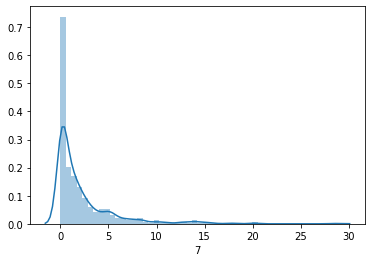

----------------------------------------------------------------
feature -  10
----------------------------------------------------------------


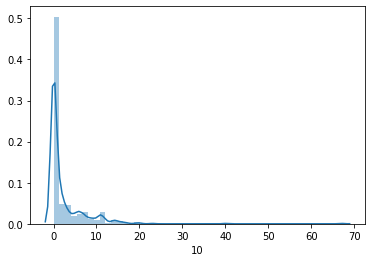

----------------------------------------------------------------
feature -  14
----------------------------------------------------------------


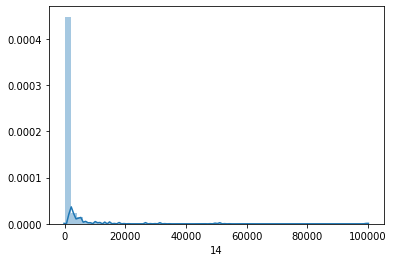

In [103]:
# Non object column features analysis

for col in dataset_file.columns:
  if dataset_file[col].dtype != "object":
    printblock("feature - ",col)
    plot(dataset_file[col])

----------------------------------------------------------------
Approved or Not graph None
----------------------------------------------------------------


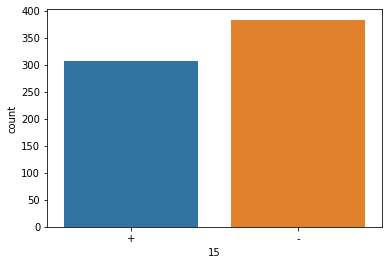

In [116]:
printblock("Approved or Not graph")
sns.countplot(data = dataset_file,x=dataset_file[15])

# Preprocessing Data

In [ ]:
# LabelEncoder() is used to convert all the data into numerical data
le = LabelEncoder()

# Looping through the dataset and transforming the data into numerical data
for col in dataset_file.columns:
  if dataset_file[col].dtype == 'object' :
    dataset_file[col] = le.fit_transform(dataset_file[col])
dataset_file.head()

# Test Train Split


In [ ]:
# Taking all values into this variable
dataset_file = dataset_file.values

# Splitting the data (table) into two different tables 
  # One with features - x
  # One with Labels - y
x,y = dataset_file[:,0:15], dataset_file[:,15]

# printing info
printblock("Dimentions info : ")
print("Dataset - dataset_file : ",str(dataset_file.shape),"\n")
print("Features - x :",str(x.shape).rjust(20),"\n")
print("Labels - y :",str(y.shape).rjust(19),"\n")

In [ ]:
# test and train splitting
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size
                                                  =0.20,random_state =20)
printblock("Train Test Splitting Info")
print("Total : 100%     - ",dataset_file.shape[0])
print("Training : 80%   - ",dataset_file.shape[0]*0.8)
print("Testing : 20%    - ",dataset_file.shape[0]*0.2)


In [ ]:
printblock("Training Dimentions")
print("Features : ",x_train.shape)
print("Labels : ",str(y_train.shape).rjust(8))
printblock("Testing Dimentions")
print("Features : ",x_test.shape)
print("Labels : ",str(y_test.shape).rjust(8))

In [ ]:
# to normalize the data we will use minmaxscaler
scaler = MinMaxScaler(feature_range=(0,1))
x_train_rescaled = scaler.fit_transform(x_train)
x_test_rescaled = scaler.fit_transform(x_test)
printblock("NOW the data is ready to be used in a Regression Model")

# Fitting the Data to a Regression Model

I will be using three Linear Models to check the accuracy in different models

Referece for the mathematics behind these models - [link](https://scikit-learn.org/stable/modules/linear_model.html)

1. Linear Regression Model
2. Logistic Regression Model
3. Ridge Regression Model

In [ ]:
# different model instances and model fit
lin_reg = LinearRegression()
log_reg = LogisticRegression()
rig_cla = RidgeClassifier();
lin_reg.fit(x_train_rescaled,y_train)
log_reg.fit(x_train_rescaled,y_train)
rig_cla.fit(x_train_rescaled,y_train)

# Predictions and Performace

The performance can be changed by tweeking the variables when fitting the model

In [ ]:
# linear
pred_y1 = lin_reg.predict(x_test_rescaled)
printblock("Linear Regression Accuracy ")
accuracy(lin_reg)

# logisitic
pred_y2 = log_reg.predict(x_test_rescaled)
printblock("Logistic Regression Accuracy ")
accuracy(log_reg)

# Ridge
pred_y3 = rig_cla.predict(x_test_rescaled)
printblock("Ridge Regression and Classifier Accuracy ")
accuracy(rig_cla)